# Aplicaciones de búsqueda por profundidad

## Introducción

Ya platicamos de la idea general y la implementación de búsqueda por profundidad. También vimos algunas de sus propiedades teóricas. Lo que haremos ahora es ver algunas de las aplicaciones que tiene hacer búsquedas por profundidad. Veremos cómo nos pueden ayudar para detectar ciclos y vértices de ariculación. Luego, estudiaremos un problema interesante de...

## Detección de ciclos

Una búsqueda por profundidad nos permite detectar ciclos. Como vimos en la entrada anterior, todas las aristas de una gráfica conexa $G$ son entre un vértice y uno de sus ancestros en el árbol por profundidad $T$.

Así, una forma de detectar algoritmicamente si una gráfica tiene ciclos o no es efectuar una búsqueda por profundidad. Si todas las aristas de $G$ son del árbol por profunidad, entonces $G$ es un árbol y por lo tanto no tiene ciclos. Sin embargo, si en algún momento exploramos una arista que nos lleve de un vértice $u$ a un ancestro $v$, entonces esta cierra un ciclo y por lo tanto la gráfica no sería acíclica.

En la siguiente implementación nos bastará con encontrar un ciclo para terminar anticipadamente la ejecución.

El ciclo encontrado fue [3, 2, 10, 6, 8, 7]


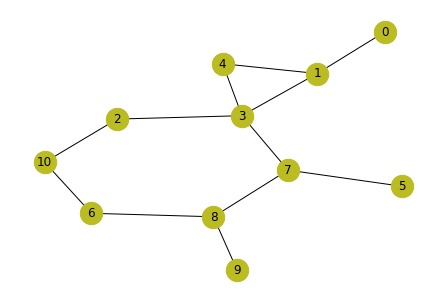

In [26]:
def ciclos(G,v0,encontrados=[],padres={},tiempo=0,inicio_p={},fin_p={}):
    tiempo+=1
    inicio_p[v0]=tiempo
    if encontrados==[]:
        encontrados=[v0]
        padres[v0]=None
    for w in G.neighbors(v0):
        if w in encontrados and padres[v0]!=w: # Verificación clave
            ciclo=[w,v0]
            while ciclo[0]!=ciclo[-1]:
                # Por propiedades de búsqueda por anchura, el ciclo
                # se puede encontrar aplicando repetidamente padre.
                ciclo.append(padres[ciclo[-1]]) 
            return ciclo
        if w not in encontrados:
            encontrados.append(w)
            padres[w]=v0
            inner_res=ciclos(G,w,encontrados,padres,tiempo,inicio_p,fin_p)
            if type(inner_res) == list: # i.e. si ya encontramos ciclo.
                return inner_res
            else: # si no encontramos ciclo, seguir recursivamente con búsqueda.
                encontrados,padres,tiempo,inicio_p,fin_p=inner_res
    tiempo+=1
    fin_p[v0]=tiempo
    return encontrados,padres,tiempo,inicio_p,fin_p

G = nx.Graph()
G.add_edges_from([(0,1), (1,3), (1,4), (7,8), (7,3), (10,2), (2,3), (3,4), (5,7), (6,8), (8,9), (6,10)])
ciclo=ciclos(G,1)
print("El ciclo encontrado fue {}".format(ciclo))
nx.draw_kamada_kawai(G,with_labels=True, node_color='#bbbb22',node_size=500)
KKL=nx.kamada_kawai_layout(G)

## Vértices de articulación

Un vértice $v$ de una gráfica conexa $G$ es un **vértices de articulación** si al quitarlo $G$ se desconecta. Por ejemplo, en la siguiente gráfica el vértice $2$ es un vértice de articulación pues al quitarlo ya es imposible ir de $4$ a $10$ mediante una trayectoria.

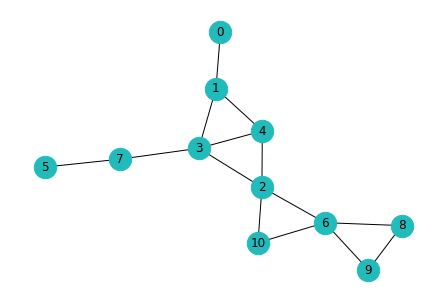

In [1]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(0,1), (6,2), (1,3), (1,4), (7,3), (10,2), (2,3), (2,4), (3,4), (6,9), (5,7), (6,8), (8,9), (6,10)])
nx.draw_kamada_kawai(G,with_labels=True, node_color='#22bbbb',node_size=500)

Es sencillo determinar si un vértice $G$ es de articulación. Basta con quitarlo y aplicar una búsqueda por anchura en la gráfica obtenida para ver si es conexa o no. Esto nos da una manera sencilla de encontrar todos los vértices de articulación: aplicamos lo mismo para cada vértice y vamos contando los que lo sean. Sin embargo, esto sería un algoritmo que corre en tiempo $O(n(m+n))$.

Podemos mejorar este tiempo de ejecución usando búsqueda por profundidad.

## Ordenamientos topológicos

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. En el ejemplo de búsqueda de ciclos el algoritmo se detuvo al encontrar el ciclo $[3, 2, 10, 6, 8, 7, 3]$. Pero este método no necesariamente encuentra todos los ciclos. ¿Encontrará también el triángulo del ejemplo? En general, ¿cómo debe ser un ciclo con respecto al árbol $T$ para que el algoritmo dado sí lo pueda encontrar? 
2. Diseña un algoritmo de búsqueda por profundidad que en tiempo $O(n)$ determine si una gráfica (no necesariamente conexa) es un bosque o no.
3. Demuestra que un vértice de una gráfica es un vértice de articulación si y sólo si se cumplen las siguientes dos condiciones:
   - Tiene grado al menos $2$.
   - No pertenece a ningún ciclo de la gráfica.
4. Problema
5. Diseña un algoritmo que encuentre ciclos dirigidos en una gráfica dirigida.